# Filtering Poor Quality Probes

Note: Separate from any filtering that ```methylcheck``` does, the qualityMask step of the ```methylprep``` processing pipeline excludes a list of probes that are historically poor quality (```SeSAMe``` masks the same list of probes, which are from the Zhou 2016 paper [linked below]). This can be turned off in ```run_pipeline``` by specifying ```quality_mask=False``` if desired.
<br><br>
There are several critera for exclusion of probes that ```methylcheck``` offers. These are designed to be in line with past research that has identified "sketchy" probes. Areas that have polymorphisms, cross-hybridization, repeat sequence elements, or base color changes can affect probe quality. ```methylcheck```'s `list_problem_probes()` function returns a list of probes excluded based on literature. For each array type, the publication list is as follows:<br>

- 450k: '[Chen2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3592906/),' '[Price2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3740789/)', '[Zhou2016](https://academic.oup.com/nar/article/45/4/e22/2290930)', '[Naeem2014](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3943510/)', '[DacaRoszak2015](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4659175/)'
- EPIC: '[Zhou2016](https://academic.oup.com/nar/article/45/4/e22/2290930)', '[McCartney2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4909830/)'

The articles are linked above, for any users that would like more detail on what probes are considered problematic and what criteria the authors have used to identify them. The lists are also formatted in the acceptable input style for the ```list_problem_probes``` function. See below for examples of its usage.

In [1]:
import methylcheck
from pathlib import Path
filepath = Path('/Users/patriciagirardi/tutorial/GPL21145')

## Available probe exclusion lists
We've imported lists of methylation probes that various researchers have previously deemed to be "sketchy." You can use `methylcheck` to remove these probes -- by referring to the list by the publication's first author name, or by the reason these probes should be excluded from analysis.

In [2]:
# this code will print the criteria reason (either a publication or a type of issue, like Polymorphism)
# as well as the number of probes excluded for that reason 

criteria = ['Chen2013', 'Price2013', 'Naeem2014', 'DacaRoszak2015','Polymorphism',
             'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']
EPIC_criteria = ['McCartney2016', 'Zhou2016', 'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']

print('450k probe exclusion criteria and number of probes excluded:')
for crit in criteria:
    print(crit, '--', len(methylcheck.list_problem_probes('450k', [crit])))

print('\nEPIC probe exclusion criteria and number of probes excluded:')
for crit in EPIC_criteria:
    print(crit, '--', len(methylcheck.list_problem_probes('EPIC', [crit])))

450k probe exclusion criteria and number of probes excluded:
Chen2013 -- 265410
Price2013 -- 213246
Naeem2014 -- 128695
DacaRoszak2015 -- 89678
Polymorphism -- 289952
CrossHybridization -- 92524
BaseColorChange -- 359
RepeatSequenceElements -- 96631

EPIC probe exclusion criteria and number of probes excluded:
McCartney2016 -- 326267
Zhou2016 -- 178671
Polymorphism -- 346033
CrossHybridization -- 108172
BaseColorChange -- 406
RepeatSequenceElements -- 0


In [3]:
# users may also get the list of probe names that are excluded for any of the criteria
methylcheck.list_problem_probes(array='epic', criteria=['Polymorphism'])[0:5]

['cg14670079', 'cg26778521', 'cg04785903', 'cg15989966', 'cg21932343']

## Filtering poor quality probes

In [4]:
# leave criteria undefined to list all problem probes for that array type
sketchy_probes_list = methylcheck.list_problem_probes(array='epic')

In [5]:
df = methylcheck.load(filepath)

# with the sketchy_probes_list defined above, we can use methylcheck.exclude_probes() to remove all the unwanted probes
excluded_df = methylcheck.exclude_probes(df, sketchy_probes_list)
excluded_df.head()

Files: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
INFO:methylcheck.load_processed:loaded data (865859, 16) from 1 pickled files (0.253s)


Of {len(df.index)} probes, {post_overlap} matched, yielding {len(df.index)-post_overlap} probes after filtering.


,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,0.852,0.749,0.739,NaN,0.891,0.896,0.757,0.734,0.806,0.881,0.740,0.885,0.693,0.779,0.617,0.891
cg00000109,0.943,0.916,0.884,0.951,0.936,0.774,0.932,0.920,0.898,0.938,0.931,0.953,0.899,0.889,0.734,0.892
cg00000165,0.237,0.733,0.374,0.639,0.397,0.564,0.486,0.194,0.163,0.557,0.531,0.856,0.171,0.173,0.865,0.581
cg00000221,0.943,0.937,0.939,0.926,0.942,0.945,0.938,0.933,0.949,0.936,0.934,0.949,0.944,0.937,0.942,0.934
cg00000236,0.922,0.934,0.919,0.881,0.926,0.882,0.927,0.774,0.937,0.957,0.932,0.952,0.923,0.938,0.932,0.951


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


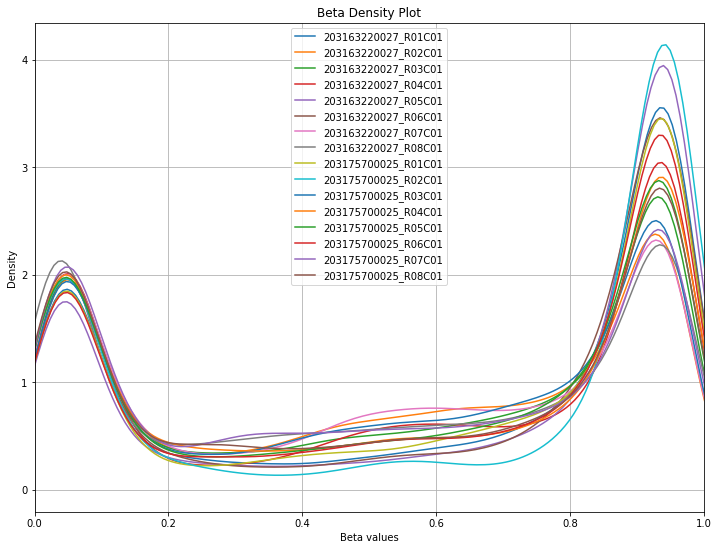

In [6]:
methylcheck.beta_density_plot(excluded_df)

To get a sense for how this affects the data, users may want to compare the mean beta density distribution before and after probe filtering.

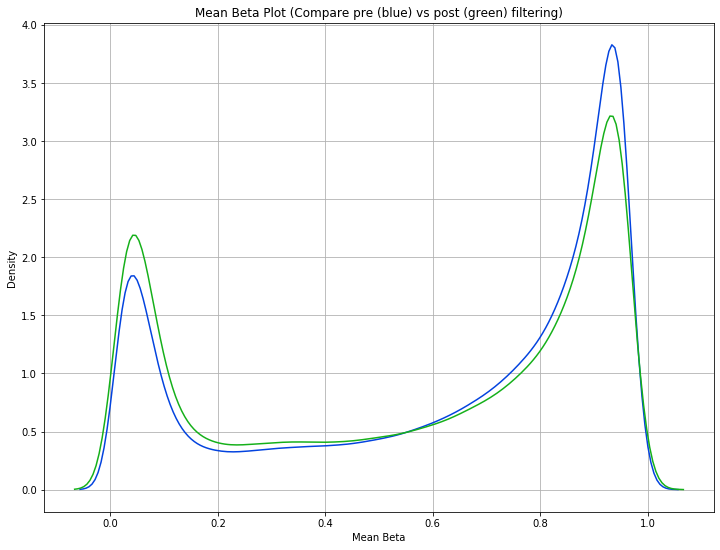

In [7]:
methylcheck.mean_beta_compare(df, excluded_df)

## Filtering sex-linked probes and control probes

Other probe types that are often filtered out are sex-linked probes and quality control probes used by Illumina. Quality control probes are automatically filtered out in `methylprep` processing with the default `qualityMask`, so there's no need to run `exclude_sex_control_probes` if you processed your data with `methylprep`. Otherwise, we recommend ```methylcheck```'s `exclude_sex_control_probes` to remove both sex-linked probes and quality control probes. 

In [8]:
filtered_df = methylcheck.exclude_sex_control_probes(excluded_df, 'epic', no_sex=True, no_control=True, verbose=True)

epic: Removed 12360 sex-linked probes from 16 samples. 464871 probes remaining.


In [9]:
filtered_df.head()

,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,0.852,0.749,0.739,NaN,0.891,0.896,0.757,0.734,0.806,0.881,0.740,0.885,0.693,0.779,0.617,0.891
cg00000109,0.943,0.916,0.884,0.951,0.936,0.774,0.932,0.920,0.898,0.938,0.931,0.953,0.899,0.889,0.734,0.892
cg00000165,0.237,0.733,0.374,0.639,0.397,0.564,0.486,0.194,0.163,0.557,0.531,0.856,0.171,0.173,0.865,0.581
cg00000221,0.943,0.937,0.939,0.926,0.942,0.945,0.938,0.933,0.949,0.936,0.934,0.949,0.944,0.937,0.942,0.934
cg00000236,0.922,0.934,0.919,0.881,0.926,0.882,0.927,0.774,0.937,0.957,0.932,0.952,0.923,0.938,0.932,0.951


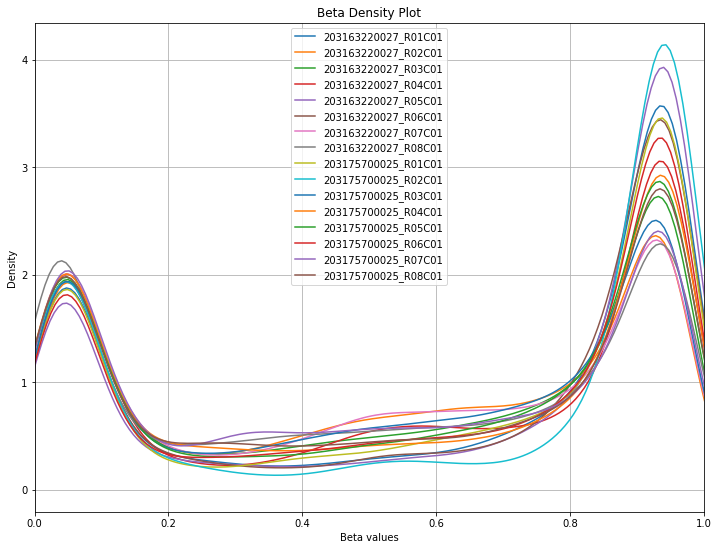

In [10]:
methylcheck.beta_density_plot(filtered_df)

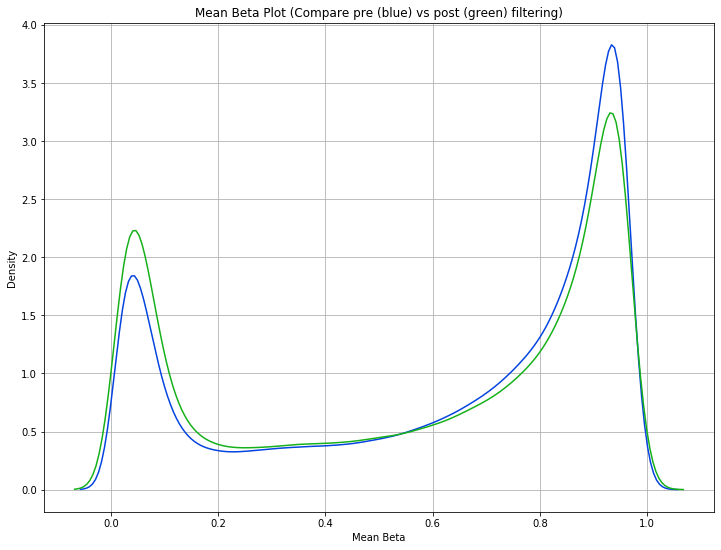

In [11]:
methylcheck.mean_beta_compare(df, filtered_df)